In [1]:
import pandas as pd                           #importing all required packages
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

import re as re

In [2]:
train=pd.read_csv('train.csv')                   #train data
print('train set shape:',train.shape)
train.head(3)

train set shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test=pd.read_csv('test.csv')                          #test data
print('test set shape:',test.shape)
test.head(3)

test set shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
train.isnull().sum()                         #checking for any null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train.Survived.value_counts()                      #how targets

0    549
1    342
Name: Survived, dtype: int64

# Feature Engineering

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#Lets start from first column of training

1) Pclass

In [9]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()        #how Survived rate in each class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


2) Sex

In [11]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


3) SibSp & Parch

In [13]:
#create new column for total family members in training set and test set

In [14]:
train['Family_Size']=train['SibSp']+train['Parch']+1

In [15]:
train[['Family_Size','Survived']].groupby(['Family_Size'],as_index=False).mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [16]:
train['Family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

In [17]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [18]:
test['Family_Size']=test['SibSp']+test['Parch']+1

In [19]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2


4) Embarked

In [20]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train.Embarked.isnull().sum()

2

In [22]:
train['Embarked']=train['Embarked'].fillna('S')

In [23]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


5) Fare

In [25]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [26]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

In [27]:
train.CategoricalFare.value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: CategoricalFare, dtype: int64

In [28]:
train[['CategoricalFare','Survived']].groupby(['CategoricalFare'],as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [29]:
test['CategoricalFare'] = pd.qcut(test['Fare'], 4)             #test as well

6) Age

In [30]:
train.Age.isnull().sum()

177

In [31]:
test.Age.isnull().sum()

86

In [32]:
train['Age'][np.isnan(train['Age'])]=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std())

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test['Age'][np.isnan(test['Age'])]=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std())

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
train['CategoricalAge']=pd.cut(train['Age'],5)

In [35]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,CategoricalFare,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,"(-0.001, 7.91]","(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]","(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]","(16.336, 32.252]"


In [36]:
train[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean()

,CategoricalAge,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.350685
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [37]:
test['CategoricalAge']=pd.cut(test['Age'],5)           #for test as well

7) Name

In [38]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name) # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [39]:
train['Title']=train['Name'].apply(get_title)

In [40]:
print(pd.crosstab(train['Title'], train['Sex']))


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [41]:
test['Title']=test['Name'].apply(get_title)            #test as well

In [42]:
train['Title']=train['Title'].replace(['Capt','Col','Mlle','Countess','Don','Dr','Jonkheer','Lady','Major','Mile','Mme','Ms','Rev','Sir'],'Rare')

In [43]:
train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [44]:
test['Title']=test['Title'].replace(['Capt','Col','Mlle','Countess','Don','Dr','Jonkheer','Lady','Dona','Major','Mile','Mme','Ms','Rev','Sir'],'Rare')

In [45]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: Title, dtype: int64

In [46]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.444444


In [47]:
train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

# Data Cleaning

In [48]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,"(-0.001, 7.91]","(16.336, 32.252]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]","(32.252, 48.168]",Mrs


In [49]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,"(-0.001, 7.896]","(30.502, 45.668]",Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,"(-0.001, 7.896]","(45.668, 60.834]",Mrs


In [50]:
#dropping,mapping(or replace, or labelling)

In [51]:
train.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [52]:
test.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [53]:
train.head(2)

,Survived,Pclass,Sex,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,0,3,male,S,2,"(-0.001, 7.91]","(16.336, 32.252]",Mr
1,1,1,female,C,2,"(31.0, 512.329]","(32.252, 48.168]",Mrs


In [54]:
test.head(2)

,Pclass,Sex,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,3,male,Q,1,"(-0.001, 7.896]","(30.502, 45.668]",Mr
1,3,female,S,2,"(-0.001, 7.896]","(45.668, 60.834]",Mrs


In [55]:
map_Sex={'female':0,'male':1}                       #mapping on sex
train['Sex']=train['Sex'].map(map_Sex).astype(int)
test['Sex']=test['Sex'].map(map_Sex).astype(int)

In [56]:
map_Embarked={'S':0,'C':1,'Q':2}                   #mapping on Embarked
train['Embarked']=train['Embarked'].map(map_Embarked).astype(int)
test['Embarked']=test['Embarked'].map(map_Embarked).astype(int)

In [57]:
map_title={'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4}
test['Title']=test['Title'].map(map_title).astype(int)
train['Title']=train['Title'].map(map_title).astype(int)
#test['Title']=test['Title'].map(map_title).astype(int)

In [58]:
train['CategoricalFare']=train['CategoricalFare'].astype(str)
test['CategoricalFare']=test['CategoricalFare'].astype(str)
train['CategoricalAge']=train['CategoricalAge'].astype(str)
test['CategoricalAge']=test['CategoricalFare'].astype(str)

In [59]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
train['CategoricalFare']=enc.fit_transform(train['CategoricalFare'])
test['CategoricalFare']=enc.fit_transform(test['CategoricalFare'])
train['CategoricalAge']=enc.fit_transform(train['CategoricalAge'])
test['CategoricalAge']=enc.fit_transform(test['CategoricalAge'])

In [60]:
train.head(3)

,Survived,Pclass,Sex,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,0,3,1,0,2,0,1,0
1,1,1,0,1,2,2,2,1
2,1,3,0,0,1,3,1,2


In [61]:
test.head(3)

,Pclass,Sex,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,3,1,2,1,0,0,0
1,3,0,0,2,0,0,1
2,2,1,2,1,3,3,0


# Modelling

In [85]:
train.shape

(891, 8)

In [86]:
test.shape

(418, 7)

In [87]:
train.head(2)

,Survived,Pclass,Sex,Embarked,Family_Size,CategoricalFare,CategoricalAge,Title
0,0,3,1,0,2,0,1,0
1,1,1,0,1,2,2,2,1


In [88]:
x=train.iloc[:,1:]
y=train.Survived

In [106]:
#1) RandomForestClassifier

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=32)
model.fit(x_train,y_train)
y_pred1=model.predict(x_train1)
accuracy_score(y_train1,y_pred1)

0.8974719101123596

In [95]:
#2 SVM

In [143]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=32)
from sklearn.svm import SVC
model2=SVC()
model2.fit(x_train2,y_train2)
y_pred2=model2.predict(x_train2)
accuracy_score(y_train2,y_pred2)

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8469101123595506

In [107]:
#3) XGBoost

In [145]:
from xgboost import XGBClassifier
model3=XGBClassifier()
x_train3,x_test3,y_train3,y_test3=train_test_split(x,y,test_size=0.2,random_state=32)
model3.fit(x_train3,y_train3)
y_pred3=model3.predict(x_train3)
accuracy_score(y_train3,y_pred3)

0.8609550561797753

In [119]:
#4) DecisionTreeClassifier

In [141]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
x_train4,x_test4,y_train4,y_test4=train_test_split(x,y,test_size=0.2,random_state=32)
model4.fit(x_train4,y_train4)
y_pred4=model4.predict(x_train4)
accuracy_score(y_train4,y_pred4)

0.9002808988764045

In [122]:
#5) KNN 

In [137]:
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier()
x_train5,x_test5,y_train5,y_test5=train_test_split(x,y,test_size=0.2,random_state=32)
model5.fit(x_train5,y_train5)
y_pred5=model5.predict(x_train5)
accuracy_score(y_train5,y_pred5)

0.8581460674157303

In [123]:
#6)adaboost

In [138]:
from sklearn.ensemble import AdaBoostClassifier
model6=AdaBoostClassifier()
x_train6,x_test6,y_train6,y_test6=train_test_split(x,y,test_size=0.2,random_state=32)
model6.fit(x_train6,y_train6)
y_pred6=model6.predict(x_train6)
accuracy_score(y_train6,y_pred6)

0.8314606741573034

In [124]:
#7) Gaussian NB

In [139]:
from sklearn.naive_bayes import GaussianNB
model7=GaussianNB()
x_train7,x_test7,y_train7,y_test7=train_test_split(x,y,test_size=0.2,random_state=32)
model7.fit(x_train7,y_train7)
y_pred7=model7.predict(x_train7)
accuracy_score(y_train7,y_pred7)

0.8174157303370787

In [125]:
#8) LogisticRegression

In [140]:
from sklearn.linear_model import LogisticRegression
model8=LogisticRegression()
x_train8,x_test8,y_train8,y_test8=train_test_split(x,y,test_size=0.2,random_state=32)
model8.fit(x_train8,y_train8)
y_pred8=model8.predict(x_train8)
accuracy_score(y_train8,y_pred8)

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8019662921348315

In [135]:
#9) GradientBoost

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
model9=GradientBoostingClassifier()
x_train9,x_test9,y_train9,y_test9=train_test_split(x,y,test_size=0.2,random_state=32)
model9.fit(x_train9,y_train9)
y_pred9=model9.predict(x_train9)
accuracy_score(y_train9,y_pred9)

0.8623595505617978

In [127]:
#10) NeuralNets

In [134]:
from sklearn.neural_network import MLPClassifier
model10=MLPClassifier()
x_train10,x_test10,y_train10,y_test10=train_test_split(x,y,test_size=0.2,random_state=32)
model10.fit(x_train10,y_train10)
y_pred10=model10.predict(x_train10)
accuracy_score(y_train10,y_pred10)

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8300561797752809

# Plot

In [146]:
Accuracy=[0.89,0.84,0.86,0.90,0.85,0.83,0.81,0.80,0.86,0.83]

In [149]:
Model=['RandomForest','SVM','XGBoost','DecissionTree','KNN','AdaBoost','GaussianNB','LogisticRegr','GradientBoost','NeuralNets']

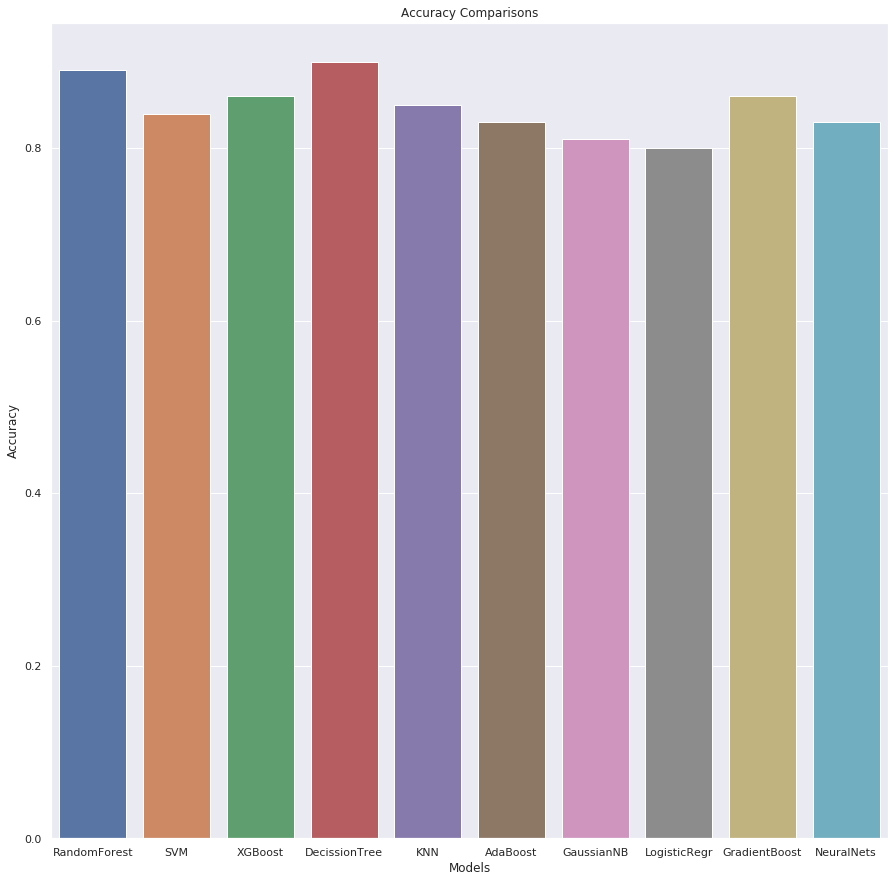

In [152]:
plt.figure(figsize=(15,15))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparisons')
sb.barplot(x=Model,y=Accuracy)

In [153]:
# DecisionTreeClassifier getting 90% accuracy
# we need go head with this classifier for Test set as well

In [156]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.0001,random_state=32)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [157]:
y_pred

array([0])